In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go


# Data Extraction

In [2]:
paid = pd.read_csv("./../data/paid_platform.csv")
paid

,Utm Medium,Utm Source,Traffic Week,# Impressions,# Clicks,$ Cost
0,paid-social,linkedin,2023-10-23,4881796,21954,"$169,017.58"
1,paid-social,linkedin,2023-10-16,6335386,15776,"$174,972.20"
2,paid-social,linkedin,2023-10-09,4485024,35009,"$327,466.25"
3,paid-social,linkedin,2023-10-02,4348074,27765,"$272,559.09"
4,paid-social,linkedin,2023-09-25,5962092,31388,"$249,770.65"
...,...,...,...,...,...,...
79,paid-search,bing,2023-07-03,48173,5662,"$28,060.26"
80,paid-search,bing,2023-06-26,52959,5267,"$23,667.38"
81,paid-search,bing,2023-06-19,57243,3996,"$23,881.69"
82,paid-search,bing,2023-06-12,23783,3195,"$18,257.71"


In [3]:
conversion = pd.read_csv("./../data/conversion_data.csv")
conversion

,Touched Date,Utm Medium,Utm Source,Utm Campaign,# Demo Occurred,# Sales Qualified Opportunity,# Closed Won Opportunity
0,2023-10-29,paid-search,google,nam-t1_acq_searchnonbranded_google_search_coun...,2.5,0.0,0.0
1,2023-10-29,paid-listicle,peoplemanagingpeople,ww_acq_prosp_pmp_paidlist_cadpayroll-pmp-__all,2.5,2.5,0.0
2,2023-10-29,paid-social,facebook,nam-t1_consider_calculate_fb_image_all-reengag...,2.4,0.0,0.0
3,2023-10-29,paid-search,google,emea-t1a_acq_searchnonbranded_google_search_pa...,0.0,0.0,0.0
4,2023-10-29,sponsored-newsletter,hrci,ww_engage_download_hrci_sponnewsletter_hr-hrbu...,0.0,0.0,0.0
...,...,...,...,...,...,...,...
11006,2023-06-05,659706244314,149096095629,NaN,1.9,2.5,0.0
11007,2023-06-05,webinar,webinar,ww_acq_prosp_webinar__defaultcamp--__all,0.0,0.0,0.0
11008,2023-06-05,cpc,bing,NaN,0.0,0.0,0.0
11009,2023-06-05,paid-social,facebook,emea-t2_acq_prosp_fb_image_all-cb-__smbmm,3.1,0.0,0.0


# Task 1: Analyzing Sales Funnel Data

## 1) Analyzing Seasonality in Sales:

In [4]:
# Convert to datetime and extract the weekday
conversion['Touched Date'] = pd.to_datetime(conversion['Touched Date'])

### By Monthly Level

In [5]:
conversion['Month'] = conversion['Touched Date'].dt.to_period('M')
monthly_data = conversion.groupby('Month').agg({
    '# Demo Occurred': 'sum',
    '# Sales Qualified Opportunity': 'sum',
    '# Closed Won Opportunity': 'sum'
}).reset_index()
monthly_data

,Month,# Demo Occurred,# Sales Qualified Opportunity,# Closed Won Opportunity
0,2023-06,3883.8,2242.9,632.5
1,2023-07,4008.2,1953.4,575.8
2,2023-08,4017.5,2122.1,458.5
3,2023-09,3832.6,2070.6,426.1
4,2023-10,4000.6,2143.1,254.0


In [9]:
 
# Conversion to datetime and extracting the month
conversion['Touched Date'] = pd.to_datetime(conversion['Touched Date'])
conversion['Month'] = conversion['Touched Date'].dt.to_period('M')

# Monthly aggregation
monthly_data = conversion.groupby('Month').agg({
    '# Demo Occurred': 'sum',
    '# Sales Qualified Opportunity': 'sum',
    '# Closed Won Opportunity': 'sum'
}).reset_index()

# Calculating averages
avg_demo = monthly_data['# Demo Occurred'].mean()
avg_sqo = monthly_data['# Sales Qualified Opportunity'].mean()
avg_cwo = monthly_data['# Closed Won Opportunity'].mean()

# Calculating percent differences
monthly_data['Demo % Diff'] = ((monthly_data['# Demo Occurred'] / avg_demo) - 1) * 100
monthly_data['SQO % Diff'] = ((monthly_data['# Sales Qualified Opportunity'] / avg_sqo) - 1) * 100
monthly_data['CWO % Diff'] = ((monthly_data['# Closed Won Opportunity'] / avg_cwo) - 1) * 100

# Preparing data for plotting
months = monthly_data['Month'].astype(str).tolist()
demo_values = monthly_data['# Demo Occurred'].tolist()
sqo_values = monthly_data['# Sales Qualified Opportunity'].tolist()
cwo_values = monthly_data['# Closed Won Opportunity'].tolist()
demo_diff = monthly_data['Demo % Diff'].tolist()
sqo_diff = monthly_data['SQO % Diff'].tolist()
cwo_diff = monthly_data['CWO % Diff'].tolist()

# Creating the figure and adding traces
fig = go.Figure()  
fig.add_trace(go.Scatter(x=months, y=demo_values,
                         mode='lines+markers',
                         name='# Demo Occurred',
                         line=dict(color='royalblue')))

fig.add_trace(go.Scatter(x=months, y=[avg_demo] * len(months),
                         mode='lines',
                         name='Avg # Demo Occurred',
                         line=dict(color='royalblue', dash='dash')))

for i, (month, demo_val, demo_d) in enumerate(zip(months, demo_values, demo_diff)):
    fig.add_annotation(x=month, y=demo_val + 240,
                       text=f"{demo_val:.2f} ({demo_d:.2f}% vs avg)",
                       showarrow=False)

fig.add_trace(go.Scatter(x=months, y=sqo_values,
                         mode='lines+markers',
                         name='# Sales Qualified Opportunity',
                         line=dict(color='firebrick')))

fig.add_trace(go.Scatter(x=months, y=[avg_sqo] * len(months),
                         mode='lines',
                         name='Avg # Sales Qualified Opportunity',
                         line=dict(color='firebrick', dash='dash')))

for i, (month, sqo_val, sqo_d) in enumerate(zip(months, sqo_values, sqo_diff)):
    fig.add_annotation(x=month, y=sqo_val + 240,
                       text=f"{sqo_val:.2f} ({sqo_d:.2f}% vs avg)",
                       showarrow=False)

fig.add_trace(go.Scatter(x=months, y=cwo_values,
                         mode='lines+markers',
                         name='# Closed Won Opportunity',
                         line=dict(color='green')))

fig.add_trace(go.Scatter(x=months, y=[avg_cwo] * len(months),
                         mode='lines',
                         name='Avg # Closed Won Opportunity',
                         line=dict(color='green', dash='dash')))

for i, (month, cwo_val, cwo_d) in enumerate(zip(months, cwo_values, cwo_diff)):
    fig.add_annotation(x=month, y=cwo_val + 240,
                       text=f"{cwo_val:.2f} ({cwo_d:.2f}% vs avg)",
                       showarrow=False)
 
fig.update_layout(title='Monthly Trends of Conversion Metrics',
                  xaxis_title='Months',
                  yaxis_title='Metric Values',
                  plot_bgcolor='white',
                  height=600,
                  width=1300)   
fig.show()


>__Demo Occurrences__: This metric shows good stability (small variability vs average), indicating a consistency on the initial engagement.

>__Sales Qualified Opportunities__: Similar to Demo Occurrences.

>__Closed Won Opportunities__: There's a noticeable decline trend. Specially in the last months. More information should be dig to find out why and where the decline is happening.

## Funnel

In [52]:
print(monthly_data)

     Month  # Demo Occurred  # Sales Qualified Opportunity  \
0  2023-06           3883.8                         2242.9   
1  2023-07           4008.2                         1953.4   
2  2023-08           4017.5                         2122.1   
3  2023-09           3832.6                         2070.6   
4  2023-10           4000.6                         2143.1   

   # Closed Won Opportunity  Demo % Diff  SQO % Diff  CWO % Diff  
0                     632.5    -1.639593    6.479240   34.752226  
1                     575.8     1.510938   -7.264458   22.672462  
2                     458.5     1.746468    0.744391   -2.317951  
3                     426.1    -2.936275   -1.700516   -9.220674  
4                     254.0     1.318462    1.741343  -45.886062  


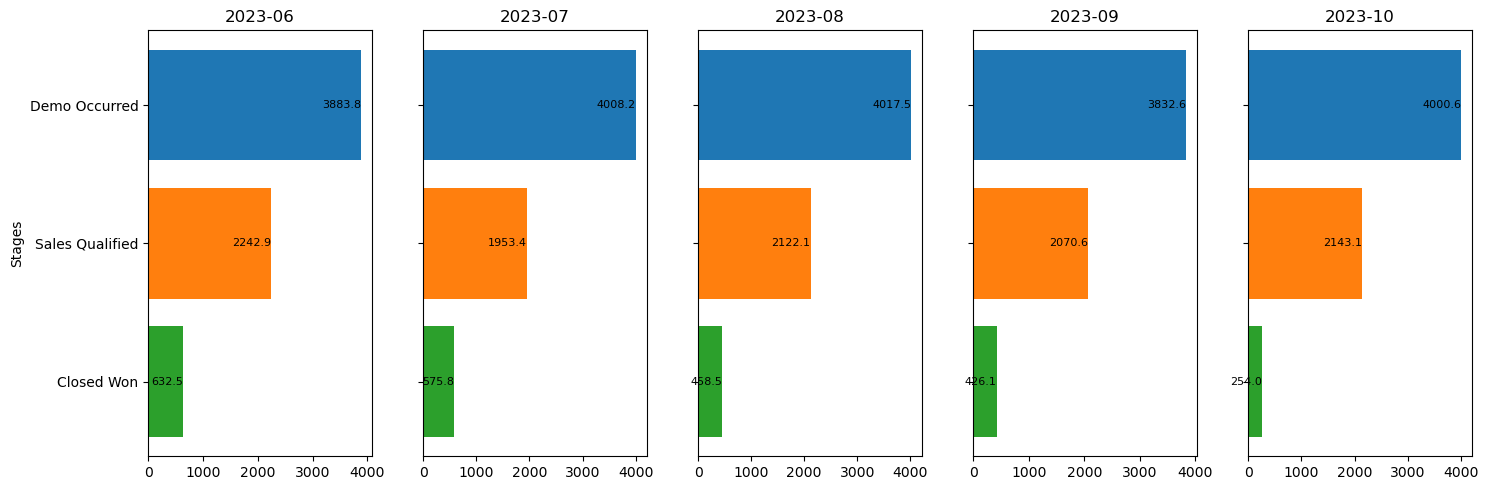

In [53]:
# Extracting data from DataFrame
months = monthly_data['Month'].tolist()
demo_occurred = monthly_data['# Demo Occurred'].tolist()
sales_qualified_opportunity = monthly_data['# Sales Qualified Opportunity'].tolist()
closed_won_opportunity = monthly_data['# Closed Won Opportunity'].tolist()

fig, axes = plt.subplots(1, 5, figsize=(15, 5), sharey=True)

# Titles for each subplot
axes[0].set_ylabel('Stages')

# Plotting each month as a separate funnel
for i, ax in enumerate(axes):
    stages = ['Demo Occurred', 'Sales Qualified', 'Closed Won']
    values = [demo_occurred[i], sales_qualified_opportunity[i], closed_won_opportunity[i]]
    ax.invert_yaxis()  # Invert y axis to have the funnel look
    ax.barh(stages, values, color=['#1f77b4', '#ff7f0e', '#2ca02c'])
    ax.set_title(months[i])
    for j, value in enumerate(values):
        ax.text(value, j, f'{value:.1f}', va='center', ha='right', color='black', fontsize=8)

plt.tight_layout()
plt.show()

In [11]:
# Prepare data for funnel chart - assuming the funnel follows: # Demo Occurred -> # Sales Qualified Opportunity -> # Closed Won Opportunity
funnel_stages = ['# Demo Occurred', '# Sales Qualified Opportunity', '# Closed Won Opportunity']

# Convert 'Month' column to string type
monthly_data['Month'] = monthly_data['Month'].astype(str)

# Extract unique months
months = monthly_data['Month'].unique().tolist()

fig = go.Figure()
for month_name in months:
    month_data = monthly_data[monthly_data['Month'] == month_name]
    x_values = [month_data[stage].values[0] for stage in funnel_stages]
    fig.add_trace(go.Funnel(
        name=month_name,
        y=funnel_stages,
        x=x_values,
        textfont = {'size': 16},
         
        textinfo="value+percent initial"))
fig.update_layout(height=500,
                  width=1500) 
fig.show()

> Here we can clearly see the proportion decline in the last step (Closed Won Opportunity), it has diminish to less than half of the usual values which are around 11-16% to 6%.

### By  Weekday level

In [12]:
conversion['Weekday'] = conversion['Touched Date'].dt.day_name()
conversion

,Touched Date,Utm Medium,Utm Source,Utm Campaign,# Demo Occurred,# Sales Qualified Opportunity,# Closed Won Opportunity,Month,Weekday
0,2023-10-29,paid-search,google,nam-t1_acq_searchnonbranded_google_search_coun...,2.5,0.0,0.0,2023-10,Sunday
1,2023-10-29,paid-listicle,peoplemanagingpeople,ww_acq_prosp_pmp_paidlist_cadpayroll-pmp-__all,2.5,2.5,0.0,2023-10,Sunday
2,2023-10-29,paid-social,facebook,nam-t1_consider_calculate_fb_image_all-reengag...,2.4,0.0,0.0,2023-10,Sunday
3,2023-10-29,paid-search,google,emea-t1a_acq_searchnonbranded_google_search_pa...,0.0,0.0,0.0,2023-10,Sunday
4,2023-10-29,sponsored-newsletter,hrci,ww_engage_download_hrci_sponnewsletter_hr-hrbu...,0.0,0.0,0.0,2023-10,Sunday
...,...,...,...,...,...,...,...,...,...
11006,2023-06-05,659706244314,149096095629,NaN,1.9,2.5,0.0,2023-06,Monday
11007,2023-06-05,webinar,webinar,ww_acq_prosp_webinar__defaultcamp--__all,0.0,0.0,0.0,2023-06,Monday
11008,2023-06-05,cpc,bing,NaN,0.0,0.0,0.0,2023-06,Monday
11009,2023-06-05,paid-social,facebook,emea-t2_acq_prosp_fb_image_all-cb-__smbmm,3.1,0.0,0.0,2023-06,Monday


In [13]:
weekly_data = conversion.groupby('Weekday').sum([['# Demo Occurred','# Sales Qualified Opportunity','# Closed Won Opportunity']])\
  .reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

In [20]:

#get max values for each metric
max_demo = weekly_data['# Demo Occurred'].max()
max_sqo = weekly_data['# Sales Qualified Opportunity'].max()
max_cwo = weekly_data['# Closed Won Opportunity'].max()

#get % difference with max
weekly_data['Demo % Diff'] = ((weekly_data['# Demo Occurred'] / max_demo) - 1) * 100
weekly_data['SQO % Diff'] = ((weekly_data['# Sales Qualified Opportunity'] / max_sqo) - 1) * 100
weekly_data['CWO % Diff'] = ((weekly_data['# Closed Won Opportunity'] / max_cwo) - 1) * 100


fig = go.Figure()
fig.add_trace(go.Scatter(x=weekly_data.index, y=weekly_data['# Demo Occurred'],
                         mode='lines+markers+text',
                         name='# Demo Occurred',
                         text=[f"{v:.2f} ({d:+.0f}% vs max)" for v, d in zip(weekly_data['# Demo Occurred'], weekly_data['Demo % Diff'])],
                         textposition="top center",
                         marker=dict(color='royalblue')))

fig.add_trace(go.Scatter(x=weekly_data.index, y=weekly_data['# Sales Qualified Opportunity'],
                         mode='lines+markers+text',
                         name='# Sales Qualified Opportunity',
                         text=[f"{v:.2f} ({d:+.0f}% vs max)" for v, d in zip(weekly_data['# Sales Qualified Opportunity'], weekly_data['SQO % Diff'])],
                         textposition="top center",
                         marker=dict(color='firebrick')))

fig.add_trace(go.Scatter(x=weekly_data.index, y=weekly_data['# Closed Won Opportunity'],
                         mode='lines+markers+text',
                         name='# Closed Won Opportunity',
                         text=[f"{v:.2f} ({d:+.0f}% vs max)" for v, d in zip(weekly_data['# Closed Won Opportunity'], weekly_data['CWO % Diff'])],
                         textposition="top center",
                         marker=dict(color='green')))

# Update layout
fig.update_layout(title='Weekly Trends of Conversion Metrics',
                  xaxis_title='Weekday',
                  yaxis_title='Metric Values',
                  plot_bgcolor='white',)

fig.show()

In [23]:
a = weekly_data['# Demo Occurred'] 
b = weekly_data['# Sales Qualified Opportunity'] 
c = weekly_data['# Closed Won Opportunity'] 
weekly_data['demo-close'] = c/a
weekly_data['demo-sales'] = b/a
weekly_data['sales-close'] = c/b
weekly_data

,# Demo Occurred,# Sales Qualified Opportunity,# Closed Won Opportunity,Demo % Diff,SQO % Diff,CWO % Diff,demo-close,demo-sales,sales-close
Weekday,,,,,,,,,
Monday,3600.5,2038.2,411.4,-7.246638,-8.453108,-21.443575,0.114262,0.566088,0.201845
Tuesday,3881.8,2226.4,523.7,0.000000,0.000000,0.000000,0.134912,0.573548,0.235223
Wednesday,3775.9,2022.2,471.1,-2.728116,-9.171757,-10.043918,0.124765,0.535554,0.232964
Thursday,3615.0,2037.0,507.4,-6.873100,-8.507007,-3.112469,0.140360,0.563485,0.249092
Friday,2954.7,1572.9,337.2,-23.883250,-29.352318,-35.611992,0.114123,0.532338,0.214381
Saturday,848.6,294.8,36.7,-78.139008,-86.758893,-92.992171,0.043248,0.347396,0.124491
Sunday,1066.2,340.6,59.4,-72.533361,-84.701761,-88.657628,0.055712,0.319452,0.174398


In [33]:
weekly_data =weekly_data.reset_index(drop=True)
weekly_data['Day Type'] = weekly_data['Weekday'].apply(lambda x: 'Weekday' if x in ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'] else 'Weekend')
weekly_data.groupby('Day Type')['demo-close'].mean()

Day Type
Weekday    0.125684
Weekend    0.049480
Name: demo-close, dtype: float64

## Autocorrelation

In [ ]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


In [ ]:
demo ='# Demo Occurred' 
sales ='# Sales Qualified Opportunity' 
close ='# Closed Won Opportunity' 
df = conversion[['Touched Date',demo]].set_index('Touched Date')

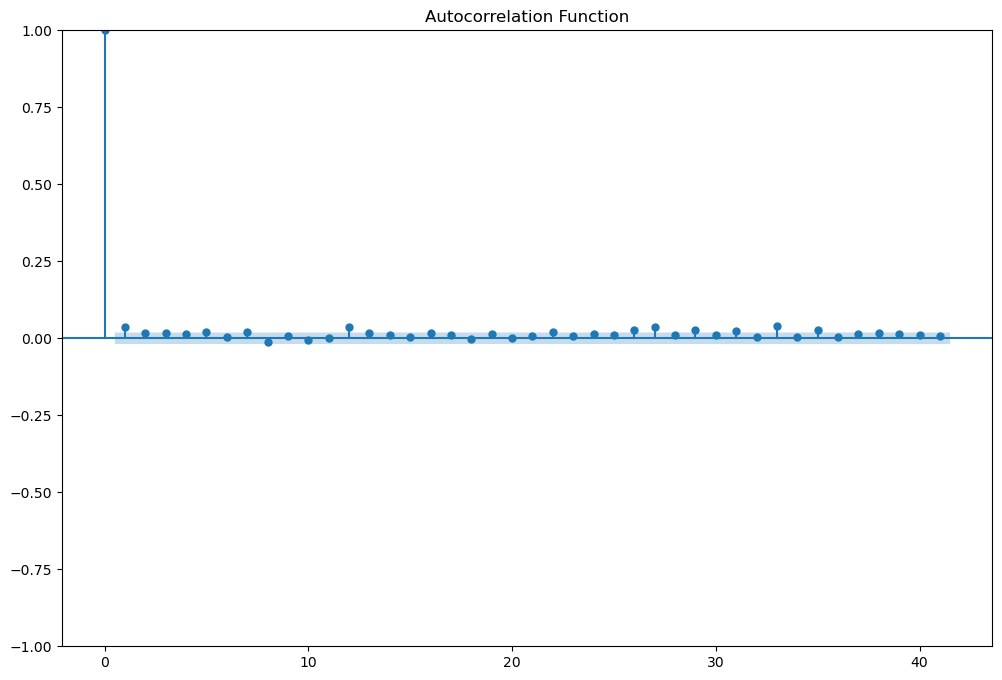

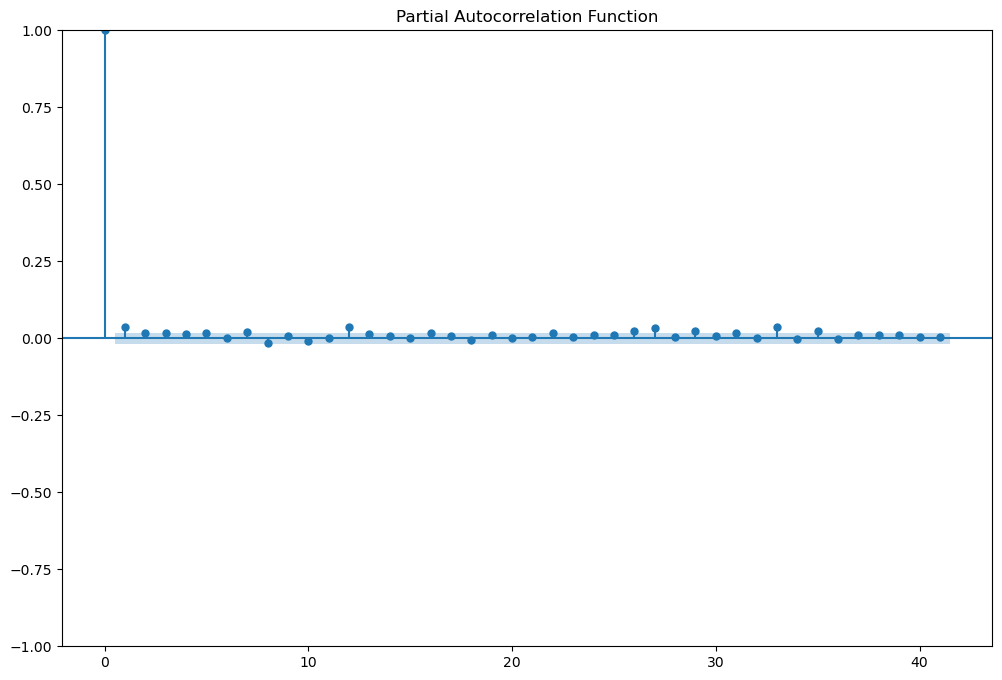

In [84]:

# AF
fig, ax = plt.subplots(figsize=(12, 8))  
plot_acf(df[demo], ax=ax)  
ax.set_title('Autocorrelation Function')  
plt.show()  

#PAF
fig, ax = plt.subplots(figsize=(12, 8))  
plot_pacf(df[demo], ax=ax)  
ax.set_title('Partial Autocorrelation Function')  
plt.show()  


The lack of significant spikes in both ACF and PACF plots suggests that there is NO strong autocorrelation

In [ ]:

plt.figure(figsize=(12, 8)) 
plot_pacf(df[demo])
plt.title('Partial Autocorrelation Function')
plt.show()


In [ ]:
# Adjusting figure size and plotting ACF
 # Larger figure size
plot_acf(df['demo'])
plt.title('Autocorrelation Function')
plt.show()

# Adjusting figure size and plotting PACF
plt.figure(figsize=(12, 8))  # Larger figure size
plot_pacf(df['demo'])
plt.title('Partial Autocorrelation Function')
plt.show()
